In [60]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [61]:
IMAGE_SIZE = 256
CHANNELS = 3

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'C:/Users/hp/Documents/Project/tomato-disease/training/dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 27384 images belonging to 21 classes.


In [79]:
27384/32

855.75

In [63]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7,
 'Potato___Early_blight': 8,
 'Potato___Late_blight': 9,
 'Potato___healthy': 10,
 'Tomato___Bacterial_spot': 11,
 'Tomato___Early_blight': 12,
 'Tomato___Late_blight': 13,
 'Tomato___Leaf_Mold': 14,
 'Tomato___Septoria_leaf_spot': 15,
 'Tomato___Spider_mites Two-spotted_spider_mite': 16,
 'Tomato___Target_Spot': 17,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 18,
 'Tomato___Tomato_mosaic_virus': 19,
 'Tomato___healthy': 20}

In [64]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [65]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.55225766 0.53968346 0.6236554 ]
  [0.54593414 0.53416944 0.6165224 ]
  [0.53898007 0.52721536 0.6095683 ]
  ...
  [0.43147418 0.4092858  0.4851367 ]
  [0.42874146 0.4056422  0.48058218]
  [0.42600876 0.4019986  0.47602767]]

 [[0.5540795  0.54104984 0.6259327 ]
  [0.5463896  0.5346249  0.6169778 ]
  [0.539891   0.5281263  0.61047924]
  ...
  [0.41189516 0.38444418 0.4550324 ]
  [0.4105288  0.38307783 0.45366606]
  [0.40916246 0.38171145 0.4522997 ]]

 [[0.5559013  0.54241616 0.62820995]
  [0.546845   0.5350803  0.61743325]
  [0.54080194 0.52903724 0.6113902 ]
  ...
  [0.4571204  0.42966938 0.5002576 ]
  [0.4767048  0.4492538  0.519842  ]
  [0.4962892  0.46883819 0.53942645]]

 ...

 [[0.67751575 0.66575104 0.74026084]
  [0.67706025 0.66529554 0.7398054 ]
  [0.67660487 0.66484016 0.73934996]
  ...
  [0.79615486 0.78439015 0.8510568 ]
  [0.52677584 0.51501113 0.5816778 ]
  [0.55940604 0.544957   0.61162364]]

 [[0.66917515 0.65741044 0.73192024]
  [0.66644245 0.65467775 0.72918755]


In [66]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        "C:/Users/hp/Documents/Project/tomato-disease/training/dataset/val",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3904 images belonging to 21 classes.


In [80]:
3904/32

122.0

In [67]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'C:/Users/hp/Documents/Project/tomato-disease/training/dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 7846 images belonging to 21 classes.


In [68]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6549948  0.5883281  0.61185753]
  [0.5982402  0.53157353 0.55510294]
  [0.52772355 0.46105695 0.48458636]
  ...
  [0.77738947 0.7342522  0.76562476]
  [0.7787555  0.73561823 0.7669908 ]
  [0.7801215  0.73698425 0.7683568 ]]

 [[0.65711975 0.5904531  0.6139825 ]
  [0.60142756 0.5347609  0.5582903 ]
  [0.5242327  0.457566   0.4810954 ]
  ...
  [0.76246727 0.71933    0.75070256]
  [0.7617083  0.71857107 0.7499436 ]
  [0.76094943 0.7178122  0.7491847 ]]

 [[0.65864307 0.5919764  0.6155058 ]
  [0.60438377 0.5377171  0.5612465 ]
  [0.5223237  0.45565704 0.47918645]
  ...
  [0.80735105 0.7642138  0.79558635]
  [0.8093242  0.76618695 0.7975595 ]
  [0.81129736 0.7681601  0.79953265]]

 ...

 [[0.5759428  0.49751142 0.5328055 ]
  [0.5785231  0.5000917  0.53538585]
  [0.57980657 0.5013752  0.5366693 ]
  ...
  [0.61570776 0.54904103 0.58041364]
  [0.49959692 0.43293026 0.4643028 ]
  [0.5582208  0.49155417 0.5229267 ]]

 [[0.5291956  0.45076418 0.48605832]
  [0.5270707  0.44863927 0.4839334 ]


In [69]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3


In [70]:
inception = InceptionV3(input_shape=[IMAGE_SIZE,IMAGE_SIZE] + [3], weights='imagenet', include_top=False)

In [71]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [72]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [73]:
x = Flatten()(inception.output)

In [74]:
prediction = Dense(21, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [75]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 127, 127, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 127, 127, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [82]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

first image to predict
actual label: Corn_(maize)___healthy
predicted label: Tomato___Tomato_Yellow_Leaf_Curl_Virus


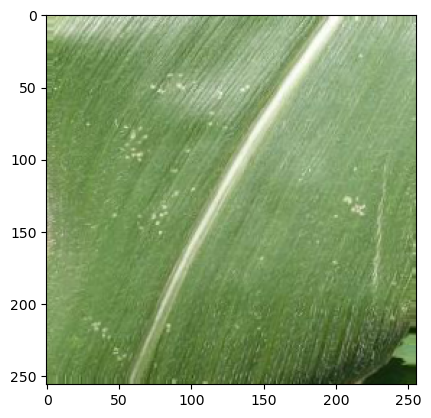

In [83]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [84]:
scores = model.evaluate(test_generator)

246/246 [==============================] - 314s 1s/step - loss: 3.4598 - accuracy: 0.0608


In [85]:
history = model.fit(
    train_generator,
    steps_per_epoch=855,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=122,
    verbose=1,
    epochs=20,
)

Epoch 1/20
855/855 [==============================] - 1289s 2s/step - loss: 3.2584 - accuracy: 0.7571 - val_loss: 3.2858 - val_accuracy: 0.8035
Epoch 2/20
855/855 [==============================] - 1207s 1s/step - loss: 2.3911 - accuracy: 0.8584 - val_loss: 3.0230 - val_accuracy: 0.8471
Epoch 3/20
855/855 [==============================] - 1181s 1s/step - loss: 1.9906 - accuracy: 0.8911 - val_loss: 3.6919 - val_accuracy: 0.8478
Epoch 4/20
855/855 [==============================] - 1199s 1s/step - loss: 2.0286 - accuracy: 0.9023 - val_loss: 2.1610 - val_accuracy: 0.9034
Epoch 5/20
855/855 [==============================] - 1206s 1s/step - loss: 1.7122 - accuracy: 0.9217 - val_loss: 1.9725 - val_accuracy: 0.9155
Epoch 6/20
855/855 [==============================] - 1189s 1s/step - loss: 1.6619 - accuracy: 0.9279 - val_loss: 2.9318 - val_accuracy: 0.8945
Epoch 7/20
855/855 [==============================] - 1136s 1s/step - loss: 1.4943 - accuracy: 0.9356 - val_loss: 2.8775 - val_accuracy:

In [86]:
scores = model.evaluate(test_generator)

246/246 [==============================] - 313s 1s/step - loss: 2.8880 - accuracy: 0.9319


In [87]:
scores

[2.8880321979522705, 0.9319398403167725]

In [88]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 855}

In [89]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [90]:
type(history.history['loss'])

list

In [91]:
len(history.history['loss'])

20

In [92]:
history.history['loss'][:5] # show loss for first 5 epochs

[3.2583768367767334,
 2.3910818099975586,
 1.9905627965927124,
 2.0285513401031494,
 1.7121789455413818]

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [94]:
val_acc

[0.8035348653793335,
 0.8470799326896667,
 0.8478483557701111,
 0.9034323692321777,
 0.9154713153839111,
 0.8944672346115112,
 0.8995901346206665,
 0.8980532884597778,
 0.9149590134620667,
 0.9203380942344666,
 0.9113729596138,
 0.9241803288459778,
 0.9236680269241333,
 0.915727436542511,
 0.931352436542511,
 0.9129098653793335,
 0.9195696711540222,
 0.9144467115402222,
 0.9372438788414001,
 0.9341700673103333]

In [95]:
acc

[0.7570561766624451,
 0.8584381341934204,
 0.8911231160163879,
 0.902347207069397,
 0.9216510653495789,
 0.9278663396835327,
 0.9356171488761902,
 0.9355440139770508,
 0.9412108659744263,
 0.9472067952156067,
 0.9525080323219299,
 0.953019917011261,
 0.9564565420150757,
 0.9555425643920898,
 0.9634761810302734,
 0.9619771838188171,
 0.9640611410140991,
 0.9660719633102417,
 0.9663644433021545,
 0.9678999781608582]

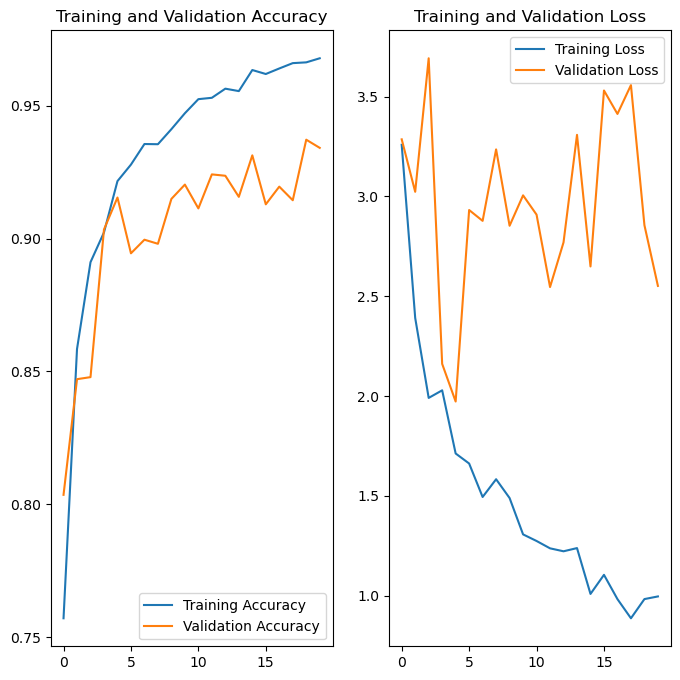

In [96]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Corn_(maize)___Common_rust_
predicted label: Corn_(maize)___Common_rust_


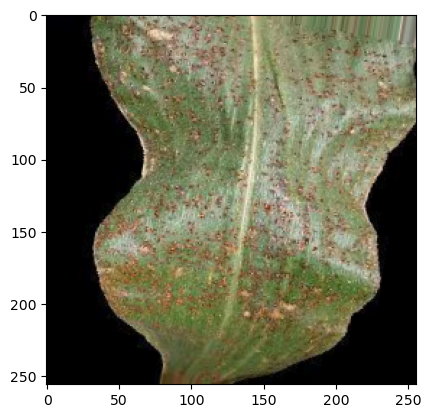

In [98]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [99]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

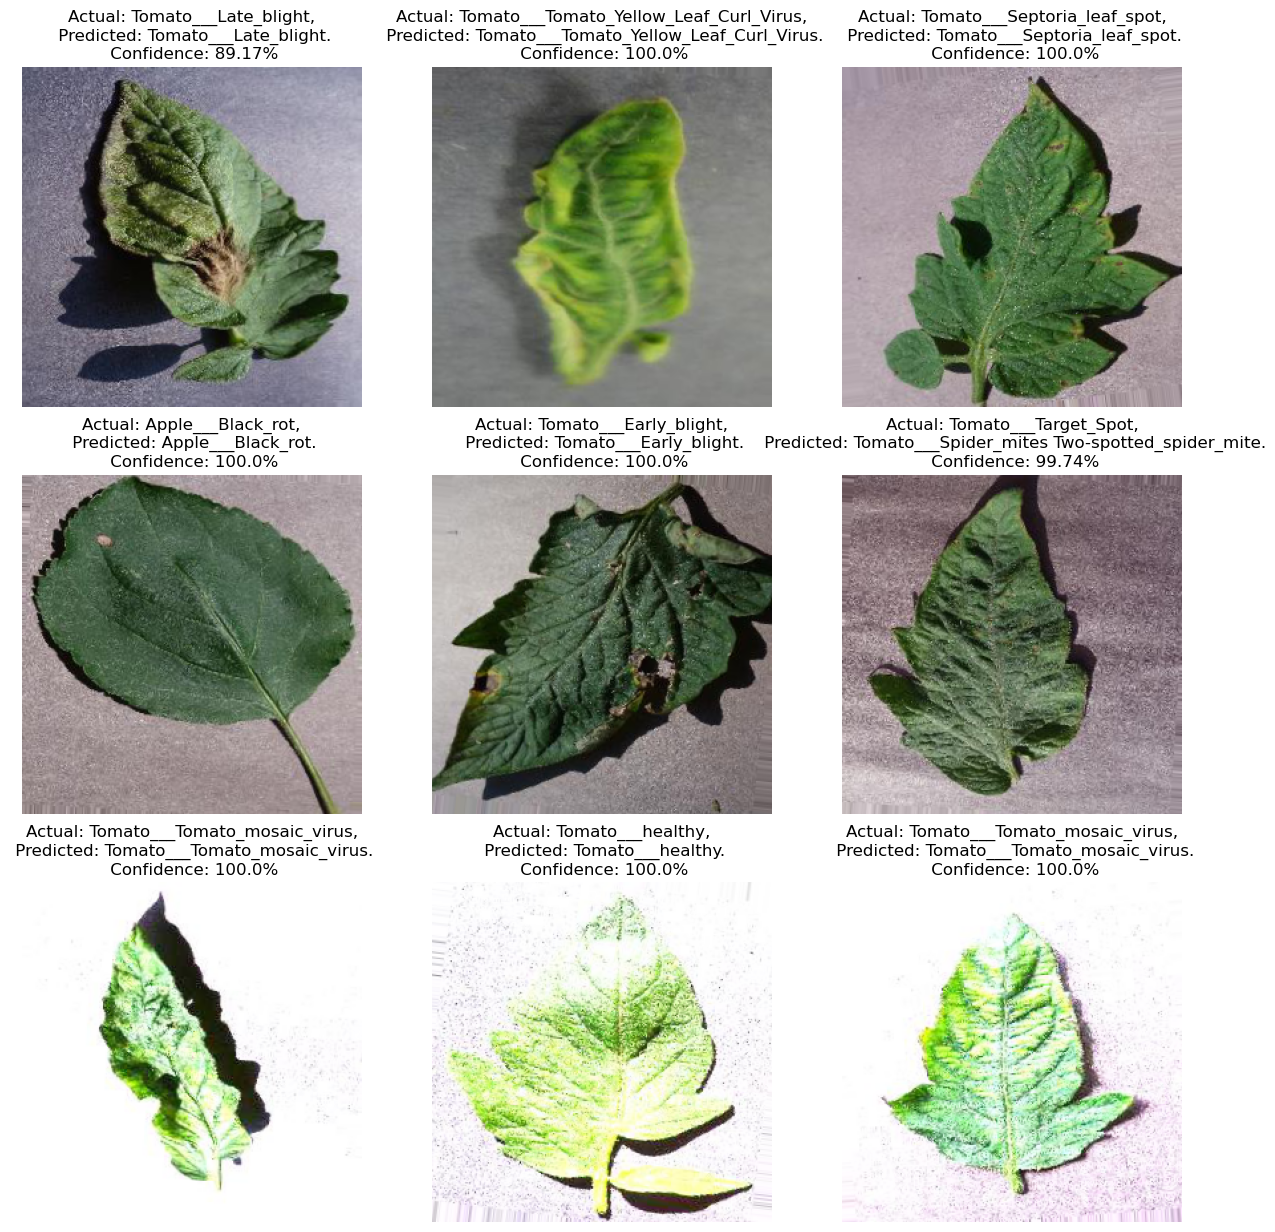

In [100]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [101]:
model.save("../disease_model.h5")